In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### Dataset
Grains from 3 varieties

In [26]:
df = pd.read_csv('datasets/Grains/seeds.csv', header=None)

label_mapper = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}
varieties = df.iloc[:,-1].map(label_mapper).values

samples = df.iloc[:,:-1].values
samples.shape

(210, 7)

### Evaluating number of clusters
- Inertia is distances between centroids and their data points. Inertia measures clustering quality, low inertia = tight clustering
- 3 is a good number for which it is the point of inertia decreasing rate starts to decline

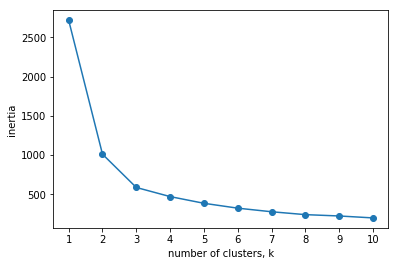

In [18]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

### Crosstab of labels and grain varieties

In [28]:
model = KMeans(n_clusters=3)

# Both fit() and predict()
labels = model.fit_predict(samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0
